## Business Problem & Objective
 The objective of this initiative is to understand and manage employee attrition within the organization. Specifically, the goal is to:

 Quantify and monitor employee attrition across the business

 Identify the key drivers and underlying factors contributing to employee turnover

 Develop a predictive model to proactively identify employees who are at higher risk of attrition

## ML Problem Identification

The machine learning problem is formulated as a binary classification task, where the objective is to predict whether an employee is likely to leave the organization or remain employed.

## DATA PREPROCESSING

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [234]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Separating the numericals and categoricals for better analysis

In [235]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print('Categorical columns:', len(cat_cols))
print('Numerical columns:', len(num_cols))
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical columns: 9
Numerical columns: 26
Categorical Columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Numerical Columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## Feature Insights


In [236]:
unique_counts = {
    col: df[col].value_counts(dropna=False)
    for col in df.columns
}

for col, vc in unique_counts.items():
    print(f"\n{col}")
    print(vc)


Age
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

DailyRate
DailyRate
691     6
1082    5
329     5
530     5
408     5
       ..
1382    1
161     1
801     1
642     1
1154    1
Name: count, Length: 886, dtype: int64

Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

DistanceFromHome
DistanceFromHome
2     211
1     208
10     8

In [237]:
def attrition_rate_by_category(df, col):
    rates = (
        df.groupby(col)['Attrition']
          .apply(lambda s: (s == 'Yes').mean())
          .sort_values(ascending=False)
    )
    return (rates * 100).round(2)

cat_insights = {}
for col in cat_cols:
    if col in df.columns:
        cat_insights[col] = attrition_rate_by_category(df, col)
        print(f"{col} (Attrition %):")
        print(cat_insights[col])

Attrition (Attrition %):
Attrition
Yes    100.0
No       0.0
Name: Attrition, dtype: float64
BusinessTravel (Attrition %):
BusinessTravel
Travel_Frequently    24.91
Travel_Rarely        14.96
Non-Travel            8.00
Name: Attrition, dtype: float64
Department (Attrition %):
Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: Attrition, dtype: float64
EducationField (Attrition %):
EducationField
Human Resources     25.93
Technical Degree    24.24
Marketing           22.01
Life Sciences       14.69
Medical             13.58
Other               13.41
Name: Attrition, dtype: float64
Gender (Attrition %):
Gender
Male      17.01
Female    14.80
Name: Attrition, dtype: float64
JobRole (Attrition %):
JobRole
Sales Representative         39.76
Laboratory Technician        23.94
Human Resources              23.08
Sales Executive              17.48
Research Scientist           16.10
Manufacturing Director        6.90
Healthcare Repres

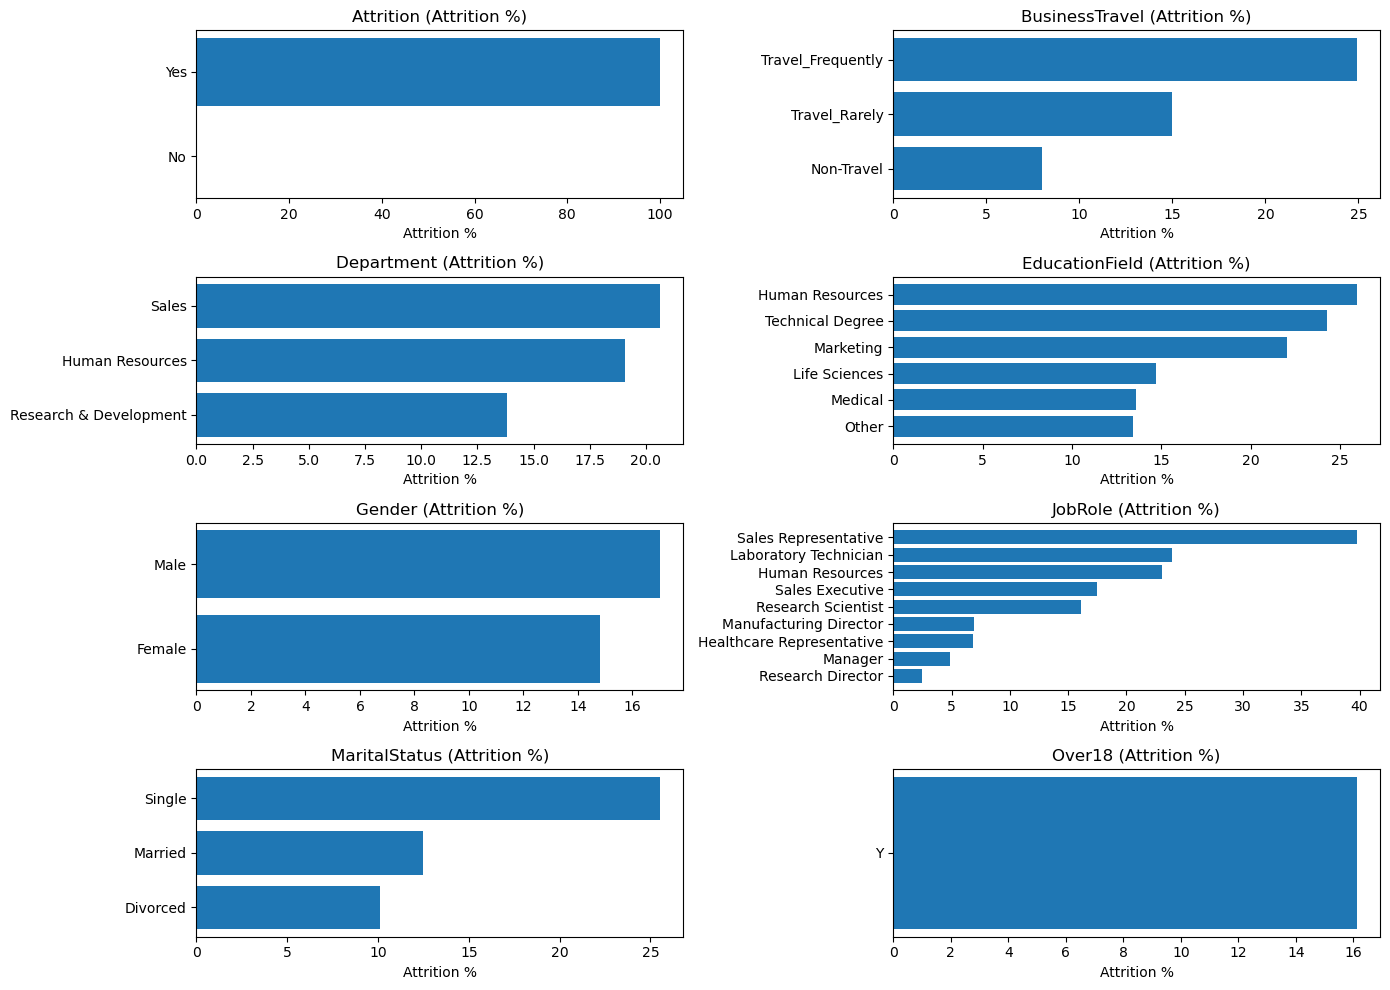

In [238]:
plot_cols = cat_cols
plot_cols = [c for c in plot_cols if c in df.columns]

n = len(plot_cols)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for ax, col in zip(axes, plot_cols):
    rates = attrition_rate_by_category(df, col).sort_values(ascending=True)
    ax.barh(rates.index, rates.values)
    ax.set_title(f'{col} (Attrition %)')
    ax.set_xlabel('Attrition %')


plt.tight_layout()
plt.show()


## Feature enginnering

Removing redundant columns and id columns

In [239]:
new_df =df.copy()
new_df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Encoding features

In [240]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ct = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first"),
         ["Department", "EducationField", "JobRole", "MaritalStatus", "Gender", "OverTime"]),
        ("ordinal", OrdinalEncoder(categories=[["Non-Travel", "Travel_Rarely", "Travel_Frequently"]]),
         ["BusinessTravel"])
    ],
    remainder="passthrough"
)

X = new_df.drop(columns=["Attrition"])
X_cat = ct.fit_transform(X)
X_cat_df = pd.DataFrame(X_cat, columns=ct.get_feature_names_out())
X_cat_df.head()

,onehot__Department_Research & Development,onehot__Department_Sales,onehot__EducationField_Life Sciences,onehot__EducationField_Marketing,onehot__EducationField_Medical,onehot__EducationField_Other,onehot__EducationField_Technical Degree,onehot__JobRole_Human Resources,onehot__JobRole_Laboratory Technician,onehot__JobRole_Manager,...,remainder__PerformanceRating,remainder__RelationshipSatisfaction,remainder__StockOptionLevel,remainder__TotalWorkingYears,remainder__TrainingTimesLastYear,remainder__WorkLifeBalance,remainder__YearsAtCompany,remainder__YearsInCurrentRole,remainder__YearsSinceLastPromotion,remainder__YearsWithCurrManager
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [241]:
y = new_df["Attrition"].map({"Yes": 1, "No": 0})

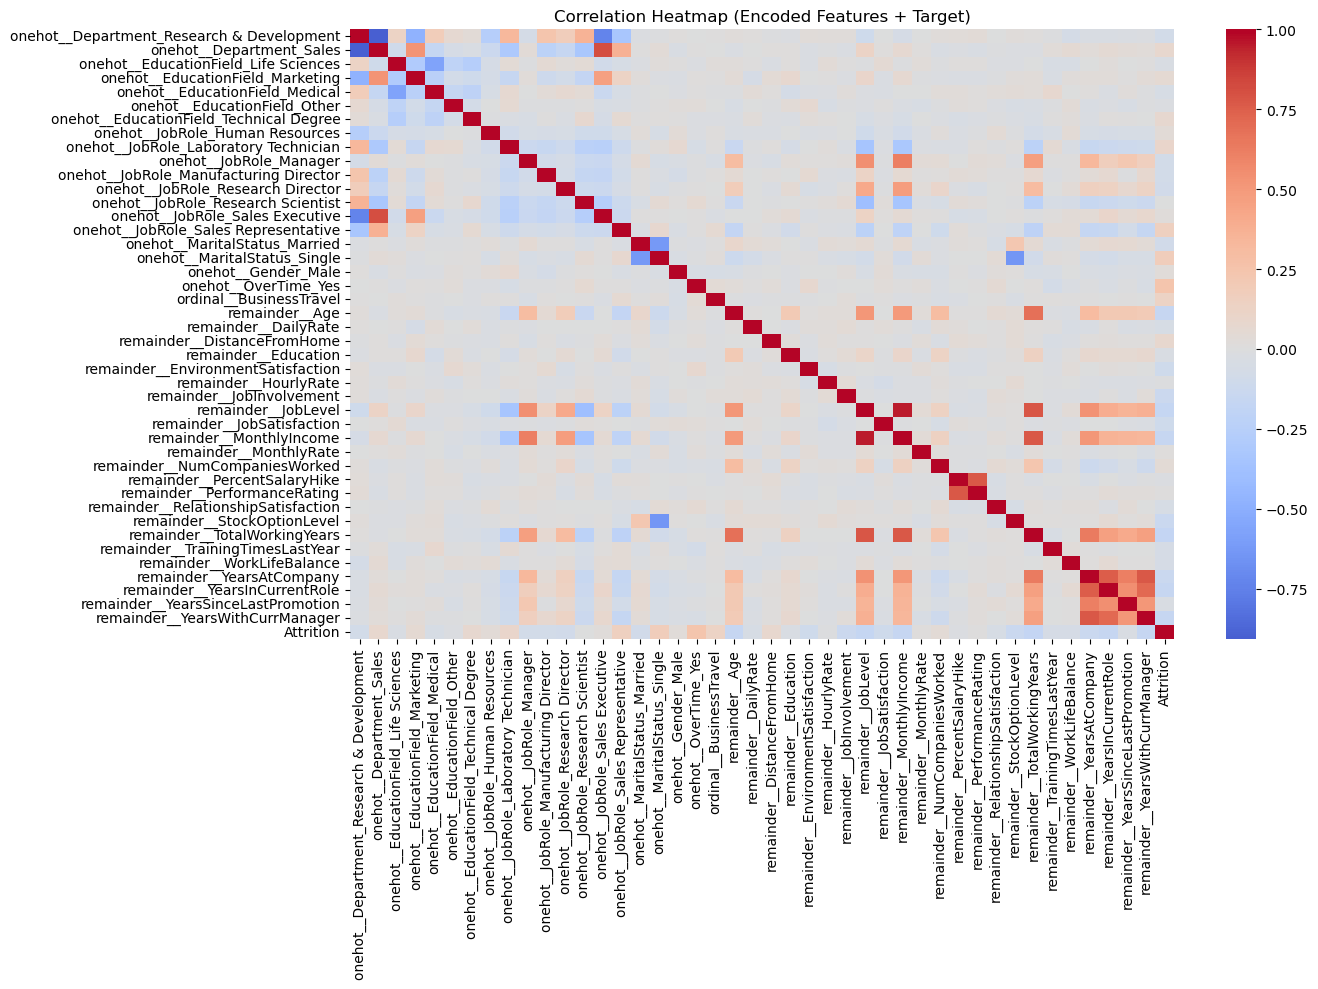

In [242]:
# Correlation heatmap (after encoding, before modeling)
import seaborn as sns
import matplotlib.pyplot as plt

# combine encoded features with target
corr_df = X_cat_df.copy()
corr_df["Attrition"] = y.values  # assumes y already defined from new_df["Attrition"]

corr = corr_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation Heatmap (Encoded Features + Target)")
plt.tight_layout()
plt.show()


In [243]:
corr = X_cat_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

high_corr = (
    upper.stack()
    .reset_index()
    .rename(columns={"level_0": "f1", "level_1": "f2", 0: "corr"})
    .sort_values("corr", ascending=False)
)

high_corr[high_corr["corr"] > 0.85]

,f1,f2,corr
784,remainder__JobLevel,remainder__MonthlyIncome,0.950300
0,onehot__Department_Research & Development,onehot__Department_Sales,0.906818


In [244]:

X_cat_df.drop(
	columns=[
		'remainder__YearsWithCurrManager',
		'remainder__YearsSinceLastPromotion',
		'remainder__YearsInCurrentRole',
		'remainder__MonthlyIncome',
		'remainder__Age',
		'onehot__Department_Sales'
	],
	inplace=True,
)

## Modeling

Logistic Regression


Splitting Train dataset and Test dataset

In [245]:
X = X_cat_df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1176, 37)
X_test shape: (294, 37)


In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled_df

,onehot__Department_Research & Development,onehot__EducationField_Life Sciences,onehot__EducationField_Marketing,onehot__EducationField_Medical,onehot__EducationField_Other,onehot__EducationField_Technical Degree,onehot__JobRole_Human Resources,onehot__JobRole_Laboratory Technician,onehot__JobRole_Manager,onehot__JobRole_Manufacturing Director,...,remainder__MonthlyRate,remainder__NumCompaniesWorked,remainder__PercentSalaryHike,remainder__PerformanceRating,remainder__RelationshipSatisfaction,remainder__StockOptionLevel,remainder__TotalWorkingYears,remainder__TrainingTimesLastYear,remainder__WorkLifeBalance,remainder__YearsAtCompany
0,-1.361752,1.206281,-0.358607,-0.669534,-0.235914,-0.329224,-0.190061,-0.472996,3.628867,-0.326041,...,0.931289,1.330763,-0.337129,-0.432065,0.240218,2.613100,2.261482,-0.605389,0.337621,-0.665706
1,0.734348,-0.828994,-0.358607,-0.669534,-0.235914,3.037447,-0.190061,2.114182,-0.275568,-0.326041,...,0.682742,-1.083704,-0.337129,-0.432065,0.240218,0.247430,-1.072675,-0.605389,0.337621,-0.830071
2,-1.361752,-0.828994,2.788569,-0.669534,-0.235914,-0.329224,-0.190061,-0.472996,3.628867,-0.326041,...,0.167705,0.123529,-0.880974,-0.432065,1.160403,0.247430,1.492061,0.190962,0.337621,0.813578
3,-1.361752,-0.828994,-0.358607,1.493576,-0.235914,-0.329224,-0.190061,-0.472996,-0.275568,-0.326041,...,1.667056,-0.681293,-1.152896,-0.432065,0.240218,-0.935405,-0.559727,-1.401740,0.337621,-0.008246
4,0.734348,-0.828994,-0.358607,1.493576,-0.235914,-0.329224,-0.190061,2.114182,-0.275568,-0.326041,...,0.728362,0.123529,-0.609051,-0.432065,-0.679966,0.247430,-0.175017,0.190962,0.337621,0.156119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-1.361752,1.206281,-0.358607,-0.669534,-0.235914,-0.329224,-0.190061,-0.472996,-0.275568,-0.326041,...,1.489999,-0.681293,1.566330,2.314467,-0.679966,0.247430,-1.072675,-0.605389,0.337621,-0.665706
1172,-1.361752,1.206281,-0.358607,-0.669534,-0.235914,-0.329224,-0.190061,-0.472996,-0.275568,-0.326041,...,0.705274,0.123529,-0.065206,-0.432065,1.160403,0.247430,-0.046780,0.190962,0.337621,-0.008246
1173,0.734348,1.206281,-0.358607,-0.669534,-0.235914,-0.329224,-0.190061,2.114182,-0.275568,-0.326041,...,-1.044433,-0.681293,-0.065206,-0.432065,-1.600151,0.247430,-0.944438,0.190962,-1.055510,-0.501341
1174,0.734348,-0.828994,-0.358607,-0.669534,4.238837,-0.329224,-0.190061,-0.472996,-0.275568,-0.326041,...,0.720851,0.525941,1.838252,2.314467,1.160403,0.247430,0.466167,-0.605389,0.337621,-0.994436


Building Logistic Regression Model


In [247]:
from sklearn.linear_model import LogisticRegression


In [248]:
model=LogisticRegression()

In [249]:
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [250]:
y_pred = model.predict(X_test_scaled)


In [251]:
model.score(X_test_scaled, y_test)

0.8639455782312925

In [252]:
from sklearn.metrics import confusion_matrix, classification_report


In [253]:
print(confusion_matrix(y_test, y_pred))

[[238   9]
 [ 31  16]]


In [254]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



Random Forest

In [255]:
X_rf = X_cat_df

from sklearn.model_selection import train_test_split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(  X_rf, y, test_size=0.2, random_state=42, stratify=y)
print("X_rf_train shape:", X_rf_train.shape)
print("X_rf_test shape:", X_rf_test.shape)

X_rf_train shape: (1176, 37)
X_rf_test shape: (294, 37)


Building Random Forest Model

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_rf_train, y_rf_train)

RandomForestClassifier()

In [257]:
y_pred_rf = rf.predict(X_rf_test)  

In [258]:
rf.score(X_rf_test, y_rf_test)

0.8469387755102041

In [259]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_rf_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_rf_test, y_pred_rf))

Confusion Matrix:
[[245   2]
 [ 43   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.67      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.76      0.54      0.53       294
weighted avg       0.82      0.85      0.79       294



In [260]:
features= pd.DataFrame({'Feature': X_rf.columns,'Importance': rf.feature_importances_})

In [261]:
features.head(15).sort_values(by='Importance', ascending=False)

,Feature,Importance
7,onehot__JobRole_Laboratory Technician,0.016442
11,onehot__JobRole_Research Scientist,0.012809
0,onehot__Department_Research & Development,0.011449
14,onehot__MaritalStatus_Married,0.010965
13,onehot__JobRole_Sales Representative,0.010924
3,onehot__EducationField_Medical,0.010795
12,onehot__JobRole_Sales Executive,0.010377
1,onehot__EducationField_Life Sciences,0.009977
5,onehot__EducationField_Technical Degree,0.008237
2,onehot__EducationField_Marketing,0.007792


Hyperparameters


In [262]:
rf_2=RandomForestClassifier(n_estimators=1000, criterion='entropy', min_samples_split=10, max_depth=14, random_state=42)

In [263]:
rf_2.fit(X_rf_train, y_rf_train)    

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [264]:
rf_2.score(X_rf_test, y_rf_test)


0.8469387755102041

In [265]:
y_pred_rf2 = rf_2.predict(X_rf_test)

In [268]:
print(confusion_matrix(y_rf_test, y_pred_rf2))

[[245   2]
 [ 43   4]]


In [266]:
print(classification_report(y_rf_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.67      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.76      0.54      0.53       294
weighted avg       0.82      0.85      0.79       294



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rus = RandomUnderSampler(random_state=42)
X_rf_train_us, y_rf_train_us = rus.fit_resample(X_rf_train, y_rf_train)

rf_2_us = RandomForestClassifier(n_estimators=1000, criterion='entropy', min_samples_split=10, max_depth=14, random_state=42)
rf_2_us.fit(X_rf_train_us, y_rf_train_us)



y_pred_rf2_us = rf_2_us.predict(X_rf_test)

print("Confusion Matrix:")
print(confusion_matrix(y_rf_test, y_pred_rf2_us))
print("\nClassification Report:")
print(classification_report(y_rf_test, y_pred_rf2_us))


Confusion Matrix:
[[188  59]
 [ 12  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       247
           1       0.37      0.74      0.50        47

    accuracy                           0.76       294
   macro avg       0.66      0.75      0.67       294
weighted avg       0.85      0.76      0.79       294



In [272]:
rf_2_us.score(X_rf_test, y_rf_test)

0.7585034013605442

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_lg_train_us, y_lg_train_us = rus.fit_resample(X_train, y_train)

lg_us = LogisticRegression()
lg_us.fit(X_lg_train_us, y_lg_train_us)



y_pred_lg_us = lg_us.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lg_us))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lg_us))


Confusion Matrix:
[[151  96]
 [ 20  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       247
           1       0.22      0.57      0.32        47

    accuracy                           0.61       294
   macro avg       0.55      0.59      0.52       294
weighted avg       0.78      0.61      0.66       294



c:\Users\Dison\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [273]:
lg_us.score(X_test, y_test)

0.6054421768707483